# Principal Component Analysis (PCA) - Wine problem 
## ------------------------------------------------------------------------------------------------------------------------------
## Problem Statement : Perform Principal component analysis and perform clustering using first 3 principal component scores (both heirarchial and k mean clustering(scree plot or elbow curve) and obtain optimum number of clusters and check whether we have obtained same number of clusters with the original data (class column we have ignored at the begining who shows it has 3 clusters) df

## 1. Import necessary libraries:

In [114]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

## 2. Import dataset :

In [124]:
wine_data = pd.read_csv('wine.csv')
wine_data

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


## 3. Data Understanding :

### 3.1 Initial Analysis :

In [3]:
wine_data.shape

(178, 14)

In [4]:
wine_data.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [5]:
wine_data.dtypes

Type                 int64
Alcohol            float64
Malic              float64
Ash                float64
Alcalinity         float64
Magnesium            int64
Phenols            float64
Flavanoids         float64
Nonflavanoids      float64
Proanthocyanins    float64
Color              float64
Hue                float64
Dilution           float64
Proline              int64
dtype: object

## 4. Model Building :

In [7]:
X = wine_data.drop(labels= 'Type',axis=1)
y = wine_data[['Type']]

In [12]:
X.shape,y.shape

((178, 13), (178, 1))

## 5. Data Pre-Processing :

In [8]:
from sklearn.preprocessing import StandardScaler

In [13]:
std_scaler = StandardScaler()
scaled_X = std_scaler.fit_transform(X)
scaled_X

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [135]:
scaled_X_df = pd.DataFrame(scaled_X,columns= X.columns)
scaled_X_df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


## 6. PCA implementation :

In [15]:
pca = PCA(n_components= 13)
wine_data_pca = pca.fit_transform(scaled_X)

In [19]:
#covariance matrix 
wine_data_covariance = pca.components_
wine_data_covariance_df = pd.DataFrame(wine_data_covariance,columns=X.columns,index=X.columns)
wine_data_covariance_df

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
Alcohol,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
Malic,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
Ash,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746
Alcalinity,-0.017856,0.536890,-0.214176,0.060859,-0.351797,0.198068,0.152295,-0.203301,0.399057,0.065926,-0.427771,0.184121,-0.232071
Magnesium,-0.265664,0.035214,-0.143025,0.066103,0.727049,-0.149318,-0.109026,-0.500703,0.136860,-0.076437,-0.173615,-0.101161,-0.157869
Phenols,-0.213539,-0.536814,-0.154475,0.100825,-0.038144,0.084122,0.018920,0.258594,0.533795,0.418644,-0.105983,-0.265851,-0.119726
Flavanoids,-0.056396,0.420524,-0.149171,-0.286969,0.322883,-0.027925,-0.060685,0.595447,0.372139,-0.227712,0.232076,-0.044764,0.076805
Nonflavanoids,-0.396139,-0.065827,0.170260,-0.427970,0.156361,0.405934,0.187245,0.233285,-0.368227,0.033797,-0.436624,0.078108,-0.120023
Proanthocyanins,0.508619,-0.075283,-0.307694,0.200449,0.271403,0.286035,0.049578,0.195501,-0.209145,0.056218,0.085828,0.137227,-0.575786
Color,0.211605,-0.309080,-0.027125,0.052799,0.067870,-0.320131,-0.163151,0.215535,0.134184,-0.290775,-0.522399,0.523706,0.162116


In [21]:
#Variance of PCA
wine_data_variance = pca.explained_variance_ratio_
wine_data_variance

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [22]:
#Cumulative Variance of PCA
np.cumsum(np.round(a=wine_data_variance,decimals = 4)*100)

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [23]:
wine_data_pca.shape

(178, 13)

In [24]:
wine_data_pca_features_df = pd.DataFrame(wine_data_pca[:,:3],columns=['PC_1','PC_2','PC_3'])
wine_data_pca_features_df

,PC_1,PC_2,PC_3
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688
...,...,...,...
173,-3.370524,-2.216289,-0.342570
174,-2.601956,-1.757229,0.207581
175,-2.677839,-2.760899,-0.940942
176,-2.387017,-2.297347,-0.550696


## 7. PCA Evaluation :

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
X_train_pca,X_test_pca,y_train_pca,y_test_pca = train_test_split(wine_data_pca_features_df,y,random_state=12,stratify=y)

In [27]:
X_train_pca.shape,y_train_pca.shape

((133, 3), (133, 1))

In [28]:
X_test_pca.shape,y_test_pca.shape

((45, 3), (45, 1))

### Model Training :

In [29]:
from sklearn.tree import DecisionTreeClassifier

In [31]:
dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_pca,y_train_pca)

DecisionTreeClassifier()

### Model Testing || Model Evaluation :

In [32]:
y_predict_train = dt_model.predict(X_train_pca)
y_predict_test = dt_model.predict(X_test_pca)

In [37]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [38]:
print('TRAINING DATA')
print('-----------------------------------------------------------------------------')
print('Accuracy Score       :',round(accuracy_score(y_train_pca,y_predict_train),4))
print('Confusion Matrix     :\n',confusion_matrix(y_train_pca,y_predict_train))
print('Classification Report:\n',classification_report(y_train_pca,y_predict_train))
print('-----------------------------------------------------------------------------\n')
print('TEST DATA')
print('-----------------------------------------------------------------------------')
print('Accuracy Score       :',round(accuracy_score(y_test_pca,y_predict_test),4))
print('Confusion Matrix     :\n',confusion_matrix(y_test_pca,y_predict_test))
print('Classification Report:\n',classification_report(y_test_pca,y_predict_test))

TRAINING DATA
-----------------------------------------------------------------------------
Accuracy Score       : 1.0
Confusion Matrix     :
 [[44  0  0]
 [ 0 53  0]
 [ 0  0 36]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      1.00      1.00        44
           2       1.00      1.00      1.00        53
           3       1.00      1.00      1.00        36

    accuracy                           1.00       133
   macro avg       1.00      1.00      1.00       133
weighted avg       1.00      1.00      1.00       133

-----------------------------------------------------------------------------

TEST DATA
-----------------------------------------------------------------------------
Accuracy Score       : 0.9778
Confusion Matrix     :
 [[14  1  0]
 [ 0 18  0]
 [ 0  0 12]]
Classification Report:
               precision    recall  f1-score   support

           1       1.00      0.93      0.97        15
           2       0.95 

## 8. Visualization :

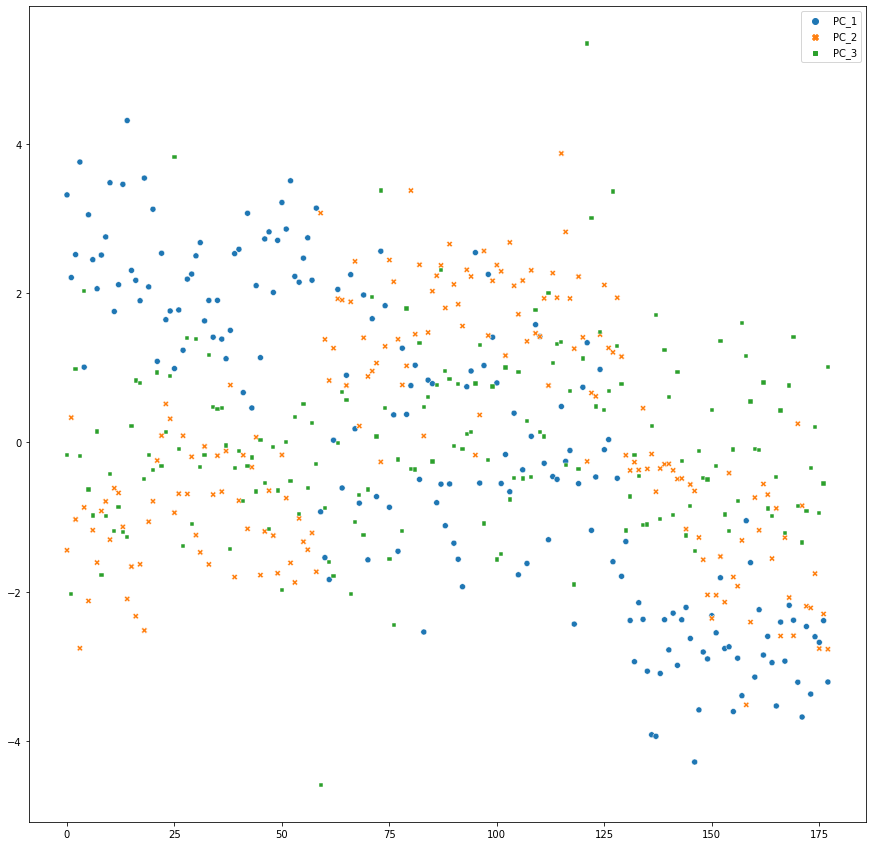

In [62]:
plt.figure(figsize=(15,15))
sns.scatterplot(data= wine_data_pca_features_df)
plt.legend()
plt.show()

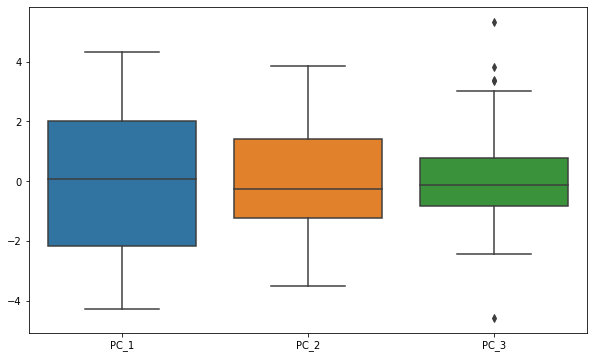

In [65]:
plt.figure(figsize=(10,6))
sns.boxplot(data = wine_data_pca_features_df)
plt.show()

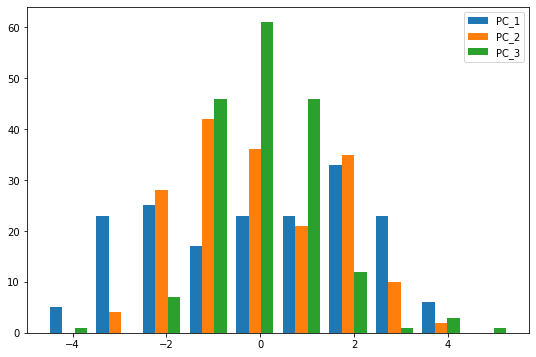

In [73]:
plt.figure(figsize=(9,6))
plt.hist(x= wine_data_pca_features_df,label=('PC_1','PC_2','PC_3'))
plt.legend()
plt.show()

## Applying other Clustering Algorithms :

### I. Hierarchical Clustering :

#### 1. Creating dendogram :

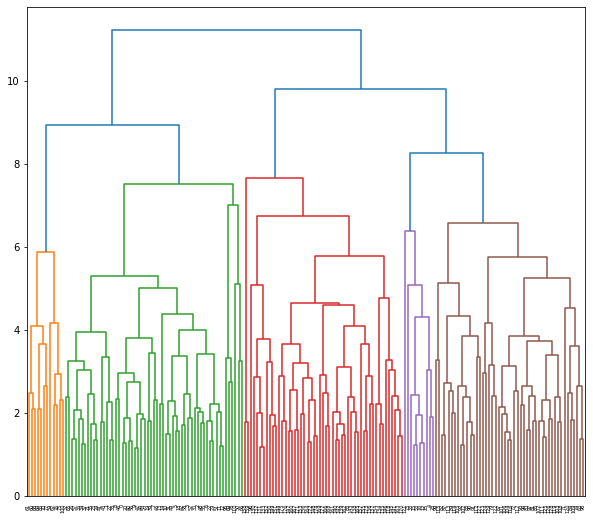

In [136]:
plt.figure(figsize=(10,9))
dendogram = sch.dendrogram(sch.linkage(scaled_X_df, method='complete'))

#### 2. Creating clusters:

In [137]:
hc_1 = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage = 'complete')
hc_1

AgglomerativeClustering(linkage='complete', n_clusters=3)

#### 3. Predicting the clusters :

In [138]:
y_hc_1 = hc_1.fit_predict(scaled_X_df)
y_hc_1

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2], dtype=int64)

#### 4. Dataframing the clusters:

In [139]:
clusters = pd.DataFrame(y_hc_1,columns=['Clusters'])
clusters

,Clusters
0,0
1,0
2,0
3,0
4,1
...,...
173,2
174,2
175,2
176,2


#### 5. Attaching the cluster predictions to the data :

In [140]:
wine_data_copy = wine_data.copy()

In [141]:
wine_data_copy['Clusters'] = clusters
wine_data_copy

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,Clusters
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [142]:
wine_data_copy['Clusters'].value_counts()

0    69
1    58
2    51
Name: Clusters, dtype: int64

In [143]:
wine_data_copy['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64

### II. Kmeans Clustering:

#### 1. Elbow Curve :

In [145]:
wcss =[]

for i in range(1,11):
    kmeans_model_1 = KMeans(n_clusters=i)
    kmeans_model_1.fit(scaled_X_df)
    wcss.append(kmeans_model_1.inertia_)

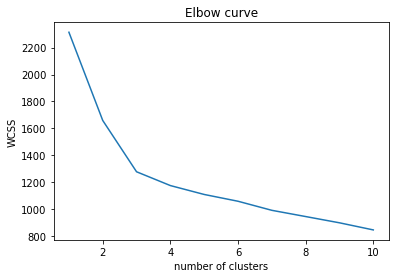

In [146]:
plt.plot(range(1,11),wcss)
plt.title('Elbow curve')
plt.xlabel('number of clusters')
plt.ylabel('WCSS')
plt.show()

In [147]:
wcss

[2313.9999999999986,
 1659.0079672511504,
 1277.928488844643,
 1175.5045995636683,
 1109.4292261848475,
 1059.0448821314053,
 991.7545024346485,
 945.4726867913566,
 898.9818472620005,
 846.1924553004048]

#### 3. Selecting appropiate cluster from above elbow curve :

In [148]:
#selecting n_clusters = 3 as minimum deviation is observed in the curve at point 3

kmeans_model_selected = KMeans(n_clusters=3)
kmeans_model_selected.fit(scaled_X)
kmeans_model_selected.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [149]:
wine_data_copy_kmeans = wine_data.copy()

In [150]:
kmeans_cluster = pd.DataFrame(kmeans_model_selected.labels_)
wine_data_copy_kmeans['kmeans_cluster'] = kmeans_cluster
wine_data_copy_kmeans

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,kmeans_cluster
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,0
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,0
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,0
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,0
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,2
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,2
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,2
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,2


In [151]:
wine_data_copy_kmeans['kmeans_cluster'].value_counts()

1    65
0    62
2    51
Name: kmeans_cluster, dtype: int64

In [152]:
wine_data_copy_kmeans['Type'].value_counts()

2    71
1    59
3    48
Name: Type, dtype: int64